In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [5]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**1. Find out how many males and females participated in the test.**

In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

**2. What do you think about the students' parental level of education?**

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df['total_score']=df['math score']+df['reading score']+df['writing score']


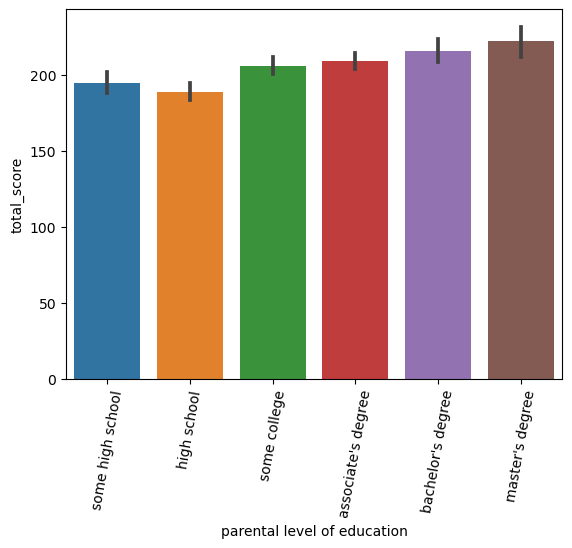

In [10]:
sns.barplot(data=df, y='total_score',x='parental level of education');
plt.xticks(rotation=80);

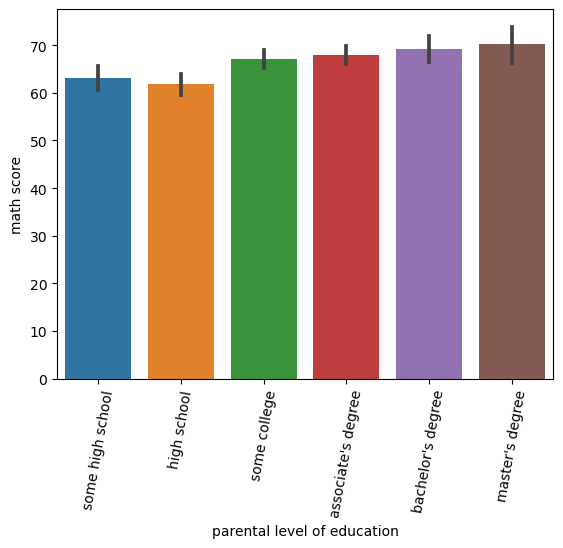

In [11]:
sns.barplot(data=df, y='math score',x='parental level of education');
plt.xticks(rotation=80);

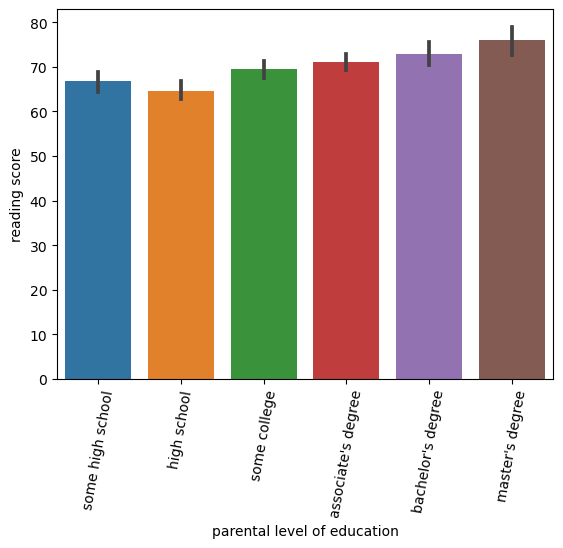

In [12]:
sns.barplot(data=df, y='reading score',x='parental level of education');
plt.xticks(rotation=80);

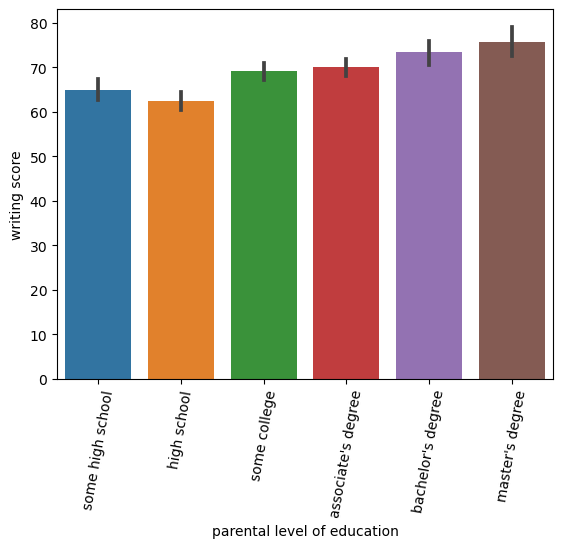

In [13]:
sns.barplot(data=df, y='writing score',x='parental level of education');
plt.xticks(rotation=80);

**Most of the parents have gone to some college or taken an assosiate degree. Also it can be seen that the students whose parents are better qualified seems to have scored more on an average.**

**3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course**

In [14]:
# Calculate average scores based on gender and test preparation course
gender_avg_scores = df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]
course_avg_scores = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]

max_gender_scores = gender_avg_scores.max()
max_course_scores = course_avg_scores.max()

max_gender_category = gender_avg_scores.idxmax()
max_course_category = course_avg_scores.idxmax()

print("Gender:")
print(f"Highest average math score: {max_gender_scores['math score']} by {max_gender_category['math score']}")
print(f"Highest average reading score: {max_gender_scores['reading score']} by {max_gender_category['reading score']}")
print(f"Highest average writing score: {max_gender_scores['writing score']} by {max_gender_category['writing score']}")

print("\nTest Preparation Course:")
print(f"Highest average math score: {max_course_scores['math score']} by {max_course_category['math score']}")
print(f"Highest average reading score: {max_course_scores['reading score']} by {max_course_category['reading score']}")
print(f"Highest average writing score: {max_course_scores['writing score']} by {max_course_category['writing score']}")


Gender:
Highest average math score: 68.82157676348548 by male
Highest average reading score: 72.59073359073359 by female
Highest average writing score: 72.46718146718146 by female

Test Preparation Course:
Highest average math score: 69.96648044692738 by completed
Highest average reading score: 74.17597765363128 by completed
Highest average writing score: 74.68435754189944 by completed


**4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course**

In [15]:

gender_scores = df.groupby('gender')['math score', 'reading score', 'writing score']
gender_range = gender_scores.max() - gender_scores.min()
gender_std = gender_scores.std()

course_scores = df.groupby('test preparation course')['math score', 'reading score', 'writing score']
course_range = course_scores.max() - course_scores.min()
course_std = course_scores.std()

print("Based on Gender:\n")
print("Range")
print("*********")
print(gender_range)
print("\nStandard deviation")
print("*********")
print(gender_std)
print('--'*30)
print("\n\nBased on Test Preparation Course:\n")
print("Range")
print("*********")
print(course_range)
print("\nStandard deviation")
print("*********")
print(course_std)


Based on Gender:

Range
*********
        math score  reading score  writing score
gender                                          
female         100             83             90
male            73             77             85

Standard deviation
*********
        math score  reading score  writing score
gender                                          
female   16.029928      14.411018      14.844842
male     14.556411      14.149594      14.227225
------------------------------------------------------------


Based on Test Preparation Course:

Range
*********
                         math score  reading score  writing score
test preparation course                                          
completed                        77             63             64
none                            100             83             90

Standard deviation
*********
                         math score  reading score  writing score
test preparation course                                          
comp

C:\Users\vishn\AppData\Local\Temp\ipykernel_19256\3884739907.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_scores = df.groupby('gender')['math score', 'reading score', 'writing score']
C:\Users\vishn\AppData\Local\Temp\ipykernel_19256\3884739907.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  course_scores = df.groupby('test preparation course')['math score', 'reading score', 'writing score']


**5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.**

In [16]:

sorted_data = df.sort_values('math score', ascending=False)# Sort the data based on math score 
cutoff_score = sorted_data['math score'].quantile(0.75) #cutoff score for the top 25%
top_25_percent = sorted_data[sorted_data['math score'] >= cutoff_score]# Select the students with math scores greater than or equal to the cutoff score
top_25_percent

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
999,male,group E,bachelor's degree,standard,completed,100,100,100,300
996,male,group A,some college,standard,completed,100,96,86,282
515,female,group E,some college,standard,none,100,92,97,289
517,female,group E,associate's degree,standard,none,100,100,100,300
516,female,group E,bachelor's degree,standard,none,100,100,100,300
...,...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62,201
849,male,group A,bachelor's degree,standard,none,77,67,68,212
850,male,group C,associate's degree,free/reduced,none,77,67,64,208
421,female,group C,some college,free/reduced,none,77,90,91,258


**List of the top 25 students**

In [17]:
# Apply bonus points to maths  
top_25_percent['math score'] += 10
top_25_percent


C:\Users\vishn\AppData\Local\Temp\ipykernel_19256\1803619778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_percent['math score'] += 10


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
999,male,group E,bachelor's degree,standard,completed,110,100,100,300
996,male,group A,some college,standard,completed,110,96,86,282
515,female,group E,some college,standard,none,110,92,97,289
517,female,group E,associate's degree,standard,none,110,100,100,300
516,female,group E,bachelor's degree,standard,none,110,100,100,300
...,...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,87,62,62,201
849,male,group A,bachelor's degree,standard,none,87,67,68,212
850,male,group C,associate's degree,free/reduced,none,87,67,64,208
421,female,group C,some college,free/reduced,none,87,90,91,258
